In [53]:
from tensorflow.keras.callbacks import TensorBoard
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime

Load the MNIST dataset from Keras API

In [30]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print(f'x_train: {x_train.shape}')
print(f'y_train: {y_train.shape}')
print(f'x_test: {x_test.shape}')
print(f'y_test: {y_test.shape}')

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


In [29]:
print(x_train[1])
print(y_train[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 25

In [34]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

print(x_train[1])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

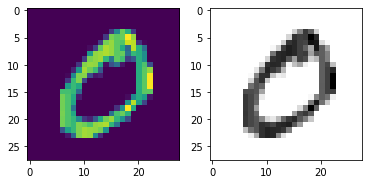

The correct label is: 0


In [36]:
fig, axs = plt.subplots(1,2)
axs[0].imshow(x_train[1])
axs[1].imshow(x_train[1], cmap=plt.cm.binary)
plt.show()

print(f'The correct label is: {y_train[1]}')

Build the model

In [47]:
NEURONS = 256
EPOCHS = 10

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(NEURONS, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
  
model.compile(
  optimizer='Adam',
  loss='sparse_categorical_crossentropy',
  metrics=['sparse_categorical_accuracy']
)

Fit the model

In [48]:
log_dir = f'logs/fit/FFNN-{NEURONS}-NEURONS-{EPOCHS}-EPOCHS-{datetime.now().strftime("%Y%m%d-%H%M%S")}'
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

model.fit(
  x_train,
  y_train,
  epochs=EPOCHS,
  validation_data=(x_test, y_test),
  callbacks=[tensorboard_callback]
)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2722 - sparse_categorical_accuracy: 0.9233 - val_loss: 0.1610 - val_sparse_categorical_accuracy: 0.9519
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1117 - sparse_categorical_accuracy: 0.9666 - val_loss: 0.1036 - val_sparse_categorical_accuracy: 0.9693
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0727 - sparse_categorical_accuracy: 0.9779 - val_loss: 0.0878 - val_sparse_categorical_accuracy: 0.9738
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0522 - sparse_categorical_accuracy: 0.9844 - val_loss: 0.0793 - val_sparse_categorical_accuracy: 0.9745
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0382 - sparse_categorical_accuracy: 0.9879 - val_loss: 0.0740 - val_sparse_categorical_accuracy: 0.9774
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0281 - spars

[3.5599362e-12 3.9612543e-14 1.0368318e-10 5.8054872e-09 1.4343892e-18
 2.6722316e-15 8.5681643e-20 1.0000000e+00 1.8291309e-13 7.9629393e-12]


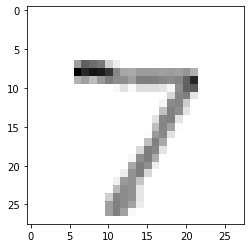

Correct label: 7
Predicted label: 7


In [68]:
predictions = model.predict(x_test)
print(predictions[0])

plt.imshow(x_test[0], cmap=plt.cm.binary)
plt.show()
print(f'Correct label: {y_test[0]}')
print(f'Predicted label: {np.argmax(predictions[0])}')

Incorrectly labelled digits: 253


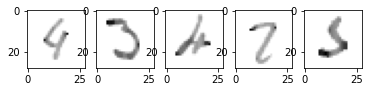

Correct labels: [4 3 4 2 5]
Predicted label: [9 2 2 7 3]


In [85]:
y_pred = np.argmax(predictions, axis=1)
mask = y_pred != y_test
print(f'Incorrectly labelled digits: {np.count_nonzero(mask)}')

incorrect_indeces = np.where(mask)
fig, axs = plt.subplots(1,5)
axs[0].imshow(x_test[incorrect_indeces[0][0]], cmap=plt.cm.binary)
axs[1].imshow(x_test[incorrect_indeces[0][1]], cmap=plt.cm.binary)
axs[2].imshow(x_test[incorrect_indeces[0][2]], cmap=plt.cm.binary)
axs[3].imshow(x_test[incorrect_indeces[0][3]], cmap=plt.cm.binary)
axs[4].imshow(x_test[incorrect_indeces[0][4]], cmap=plt.cm.binary)
plt.show()

print(f'Correct labels: {y_test[incorrect_indeces[0][0:5]]}')
print(f'Predicted label: {y_pred[incorrect_indeces[0][0:5]]}')